Nama  : Muhammad Zhafran Ghaly

ID    : m183x0348


Kelas : M02


Divisi: Machine Learning and Front-End

In [46]:
import tensorflow as tf
import matplotlib.image as mpimg
import zipfile, os
import numpy as np
import matplotlib.pyplot as plt
import PIL
import shutil
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam


In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d moltean/fruits

In [22]:
!unzip '/content/fruits.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-36

In [25]:
def list_files(path):
  files_num = 0
  for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * (level)
    files_num += len(files)
    print('{}{}/ {}'.format(indent, os.path.basename(root), (str(len(files)) + ' images' if len(files) > 0 else '')))
  
  return files_num

In [26]:
my_dir = '/content/fruits-360_dataset/fruits-360/Training'
list_files(my_dir)

In [27]:
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Apple Braeburn'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Apple Crimson Snow'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Apple Golden 1'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Apple Golden 2'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Apple Golden 3'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Apple Granny Smith'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Apple Pink Lady'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Apple Red Delicious'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Apple Red Yellow 1'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Apple Red Yellow 2'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Avocado ripe'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Banana Lady Finger'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Banana Red'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Beetroot'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cactus fruit'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cantaloupe 1'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cantaloupe 2'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cauliflower'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cherry 1'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cherry 2'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cherry Rainier'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cherry Wax Black'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cherry Wax Red'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cherry Wax Yellow'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Clementine'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cocos'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Corn Husk'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cucumber Ripe'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Cucumber Ripe 2'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Dates'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Eggplant'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Fig'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Ginger Root'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Granadilla'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Grape Blue'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Grape Pink'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Grape White'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Grape White 2'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Grape White 3'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Grape White 4'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Grapefruit Pink'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Grapefruit White'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Huckleberry'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Kaki'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Kiwi'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Kohlrabi'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Kumquats'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Lemon Meyer'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Limes'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Mandarine'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Mango Red'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Mangostan'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Maracuja'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Mulberry'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Nectarine'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Nectarine Flat'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Nut Pecan'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Nut Forest'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Onion Red'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Onion Red Peeled'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Onion White'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Passion Fruit'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Peach 2'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pear 2'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pear Abate'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pear Forelle'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pear Kaiser'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pear Monster'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pear Red'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pear Stone'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pear Williams'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Peach Flat'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato Maroon'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pepino'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pepper Green'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pepper Orange'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pepper Red'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pepper Yellow'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Physalis'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Physalis with Husk'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pineapple Mini'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pitahaya Red'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Plum 2'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Plum 3'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pomegranate'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pomelo Sweetie'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Potato Red'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Potato Red Washed'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Potato Sweet'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Potato White'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Quince'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Raspberry'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Redcurrant'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Strawberry Wedge'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tamarillo'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tangelo'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato 1'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato 2'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato 3'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato 4'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato Heart'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato Marron'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato Yellow'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato not Ripened'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato Walnut'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Tomato Watermelon'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Walnut'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Watermelon'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Strawberry'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Corn'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Hazelnut'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Papaya'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Guava'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Carambula'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Chestnut'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Lychee'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Orange'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Plum'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Pineapple'
!rm -rf '/content/fruits-360_dataset/fruits-360/Training/Guava'

In [28]:
def read_files(path):
  image_files = []
  for dirname, dirnames, filenames in os.walk(path):
    for filename in filenames:
      image_files.append(os.path.join(dirname, filename))
  
  return image_files

In [29]:
full_directory = read_files(my_dir)
image_sizes = []
for file in full_directory:
  image = PIL.Image.open(file)
  width, height = image.size
  image_sizes.append(f'{width}x{height}')

unique_sizes = set(image_sizes)

print(f'Image size list (first 15 unique size): \n{list(unique_sizes)[:15]}')

Image size list (first 15 unique size): 
['100x100']


In [30]:
training_dir = os.path.join(my_dir, 'Train')
validation_dir = os.path.join(my_dir, 'Valid')

In [31]:
os.mkdir(training_dir)
os.mkdir(validation_dir)

In [32]:
apricot = os.path.join(my_dir, 'Apricot')
avocado = os.path.join(my_dir, 'Avocado')
banana = os.path.join(my_dir, 'Banana')
blueberry = os.path.join(my_dir, 'Blueberry')
salak = os.path.join(my_dir, 'Salak')
rambutan = os.path.join(my_dir, 'Rambutan')
pear = os.path.join(my_dir, 'Pear')
peach = os.path.join(my_dir, 'Peach')
mango = os.path.join(my_dir, 'Mango')
lemon = os.path.join(my_dir, 'Lemon')

In [33]:
apricot_train = os.path.join(training_dir, 'Apricot')
avocado_train = os.path.join(training_dir, 'Avocado')
banana_train = os.path.join(training_dir, 'Banana')
blueberry_train = os.path.join(training_dir, 'Blueberry')
salak_train = os.path.join(training_dir, 'Salak')
rambutan_train = os.path.join(training_dir, 'Rambutan')
pear_train = os.path.join(training_dir, 'Pear')
peach_train = os.path.join(training_dir, 'Peach')
mango_train = os.path.join(training_dir, 'Mango')
lemon_train = os.path.join(training_dir, 'Lemon')

In [34]:
apricot_valid = os.path.join(validation_dir, 'Apricot')
avocado_valid = os.path.join(validation_dir, 'Avocado')
banana_valid = os.path.join(validation_dir, 'Banana')
blueberry_valid = os.path.join(validation_dir, 'Blueberry')
salak_valid = os.path.join(validation_dir, 'Salak')
rambutan_valid = os.path.join(validation_dir, 'Rambutan')
pear_valid = os.path.join(validation_dir, 'Pear')
peach_valid = os.path.join(validation_dir, 'Peach')
mango_valid = os.path.join(validation_dir, 'Mango')
lemon_valid = os.path.join(validation_dir, 'Lemon')

In [35]:
#Training
os.mkdir(apricot_train)
os.mkdir(avocado_train)
os.mkdir(banana_train)
os.mkdir(blueberry_train)
os.mkdir(salak_train)
os.mkdir(rambutan_train)
os.mkdir(pear_train)
os.mkdir(peach_train)
os.mkdir(mango_train)
os.mkdir(lemon_train)
#Validation
os.mkdir(apricot_valid)
os.mkdir(avocado_valid)
os.mkdir(banana_valid)
os.mkdir(blueberry_valid)
os.mkdir(salak_valid)
os.mkdir(rambutan_valid)
os.mkdir(pear_valid)
os.mkdir(peach_valid)
os.mkdir(mango_valid)
os.mkdir(lemon_valid)

In [36]:
apricot_training_dir, apricot_validation_dir = train_test_split(os.listdir(apricot), test_size=0.20)
avocado_training_dir, avocado_validation_dir = train_test_split(os.listdir(avocado), test_size=0.20)
banana_training_dir, banana_validation_dir = train_test_split(os.listdir(banana), test_size=0.20)
blueberry_training_dir, blueberry_validation_dir = train_test_split(os.listdir(blueberry), test_size=0.20)
salak_training_dir, salak_validation_dir = train_test_split(os.listdir(salak), test_size=0.20)
rambutan_training_dir, rambutan_validation_dir = train_test_split(os.listdir(rambutan), test_size=0.20)
pear_training_dir, pear_validation_dir = train_test_split(os.listdir(pear), test_size=0.20)
peach_training_dir, peach_validation_dir = train_test_split(os.listdir(peach), test_size=0.20)
mango_training_dir, mango_validation_dir = train_test_split(os.listdir(mango), test_size=0.20)
lemon_training_dir, lemon_validation_dir = train_test_split(os.listdir(lemon), test_size=0.20)

In [37]:
for file in apricot_training_dir:
  shutil.copy(os.path.join(apricot, file), os.path.join(apricot_train, file))
for file in avocado_training_dir:
  shutil.copy(os.path.join(avocado, file), os.path.join(avocado_train, file))
for file in banana_training_dir:
  shutil.copy(os.path.join(banana, file), os.path.join(banana_train, file))
for file in blueberry_training_dir:
  shutil.copy(os.path.join(blueberry, file), os.path.join(blueberry_train, file))
for file in salak_training_dir:
  shutil.copy(os.path.join(salak, file), os.path.join(salak_train, file))
for file in rambutan_training_dir:
  shutil.copy(os.path.join(rambutan, file), os.path.join(rambutan_train, file))
for file in pear_training_dir:
  shutil.copy(os.path.join(pear, file), os.path.join(pear_train, file))
for file in peach_training_dir:
  shutil.copy(os.path.join(peach, file), os.path.join(peach_train, file))
for file in mango_training_dir:
  shutil.copy(os.path.join(mango, file), os.path.join(mango_train, file))
for file in lemon_training_dir:
  shutil.copy(os.path.join(lemon, file), os.path.join(lemon_train, file))
#------
for file in apricot_validation_dir:
  shutil.copy(os.path.join(apricot, file), os.path.join(apricot_valid, file))
for file in avocado_validation_dir:
  shutil.copy(os.path.join(avocado, file), os.path.join(avocado_valid, file))
for file in banana_validation_dir:
  shutil.copy(os.path.join(banana, file), os.path.join(banana_valid, file))
for file in blueberry_validation_dir:
  shutil.copy(os.path.join(blueberry, file), os.path.join(blueberry_valid, file))
for file in salak_validation_dir:
  shutil.copy(os.path.join(salak, file), os.path.join(salak_valid, file))
for file in rambutan_validation_dir:
  shutil.copy(os.path.join(rambutan, file), os.path.join(rambutan_valid, file))
for file in pear_validation_dir:
  shutil.copy(os.path.join(pear, file), os.path.join(pear_valid, file))
for file in peach_validation_dir:
  shutil.copy(os.path.join(peach, file), os.path.join(peach_valid, file))
for file in mango_validation_dir:
  shutil.copy(os.path.join(mango, file), os.path.join(mango_valid, file))
for file in lemon_validation_dir:
  shutil.copy(os.path.join(lemon, file), os.path.join(lemon_valid, file))

In [95]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    
)

In [96]:
train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size = (100,100),
    batch_size = 32,
    class_mode = 'categorical' 
)

valid_generator = training_datagen.flow_from_directory(
    validation_dir,
    target_size = (100,100),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 3851 images belonging to 10 classes.
Found 968 images belonging to 10 classes.


In [97]:
img = (100,100,3)
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters = 8,kernel_size = (3, 3),padding="Same", activation='relu', input_shape=(img)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters = 16,kernel_size = (3, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(filters = 32,kernel_size = (3, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        


])

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999),
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 50, 50, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 48, 48, 16)        1168      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 11, 11, 32)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [100]:
class fruitCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.90) and (logs.get('val_accuracy')>=0.90):
      print('\nTrain and test accuracy has reached 90%!')
      self.model.stop_training = True
callbacks = fruitCallbacks()

In [101]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 200,
    validation_data = valid_generator,
    validation_steps = 2,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/200
100/100 - 19s - loss: 0.3945 - accuracy: 0.8794 - val_loss: 0.0291 - val_accuracy: 1.0000 - 19s/epoch - 187ms/step
Epoch 2/200

Train and test accuracy has reached 90%!
100/100 - 18s - loss: 0.0939 - accuracy: 0.9703 - val_loss: 0.1088 - val_accuracy: 0.9375 - 18s/epoch - 183ms/step


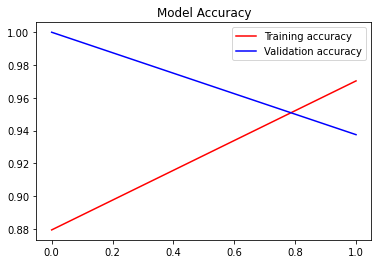

<Figure size 432x288 with 0 Axes>

In [102]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Model Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

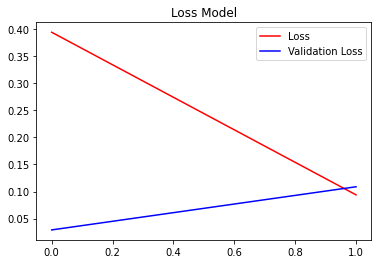

<Figure size 432x288 with 0 Axes>

In [103]:
plt.plot(epochs, loss, 'r', label='Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss Model')
plt.legend(loc=0)
plt.figure()

plt.show()

In [98]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite = converter.convert()

In [99]:
with tf.io.gfile.GFile('Fruit_Classification.tflite', 'wb') as f:
  f.write(tflite)